### There are 560000 Record and each Record contains simulated gravitational wave measurement samples from 3 gravitational wave interferometers from different places(LIGO Hanford, LIGO Livingston, and Virgo) and some simulated gravitational wave signal..

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from gwpy.timeseries import TimeSeries
from gwpy.plot import Plot

In [2]:
df = pd.read_csv("g2net-gravitational-wave-detection/training_labels.csv")
df.head(3)

id  target
0  00000e74ad       1
1  00001f4945       0
2  0000661522       0

<AxesSubplot:xlabel='target', ylabel='count'>

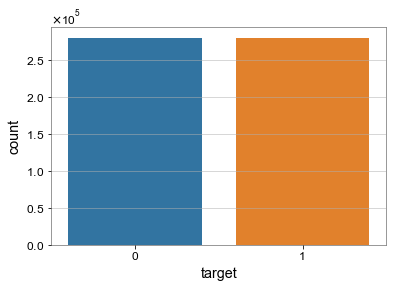

In [3]:
sns.countplot(data=df, x="target")

In [4]:
df["path"]= df["id"].apply(lambda x : "g2net-gravitational-wave-detection/train/" +x[0] +"/"+x[1] +"/"+x[2] +"/" + x+".npy")

In [5]:
df.head()

id  target                                               path
0  00000e74ad       1  g2net-gravitational-wave-detection/train/0/0/0...
1  00001f4945       0  g2net-gravitational-wave-detection/train/0/0/0...
2  0000661522       0  g2net-gravitational-wave-detection/train/0/0/0...
3  00007a006a       0  g2net-gravitational-wave-detection/train/0/0/0...
4  0000a38978       1  g2net-gravitational-wave-detection/train/0/0/0...

In [6]:
print(f"Number of Records present is: {df.shape[0]}")

Number of Records present is: 560000


### Each Record (.npy file) contains 3 time series that spans for 2 seconds and the sampling ratio 2,048 Hz.

In [7]:
# Load a .npy record
def getting_the_signal(file_number:int):
    '''
    file_number:Location of record you want to retrieve and load
    
    output-signal_data : nd-array of the loaded signal
    '''
    path = df['path'][file_number]
    signal_data = np.load(path)
    return signal_data

In [8]:
getting_the_signal(49)

array([[ 9.82709160e-21,  9.95434359e-21,  9.99028164e-21, ...,
         5.31705084e-21,  5.29317918e-21,  4.76440313e-21],
       [ 1.84115710e-21,  1.45021548e-21,  1.70294294e-21, ...,
         9.35072973e-21,  9.91288092e-21,  1.01856681e-20],
       [-1.72000577e-21, -1.62446778e-21, -1.67695444e-21, ...,
        -1.46270376e-21, -1.83572498e-21, -1.51245030e-21]])

In [9]:
# Transform the array into a time-domain data array.
def read_file(data):
    '''
    data: Loaded data
    
    d1,d2,d3 : Time-Domain array of each sample
    '''
    d1 = TimeSeries(data[0,:], sample_rate=2048)
    d2 = TimeSeries(data[1,:], sample_rate=2048)
    d3 = TimeSeries(data[2,:], sample_rate=2048)
    return d1, d2, d3

# To plot the sample
def plot_time_data(d1, d2, d3):
    
    plot = Plot(d1, d2, d3, separate=True, sharex=True, figsize=[12, 8],label=['LIGO_H', 'LIGO_L', 'Virgo'])
    ax = plot.gca()
    ax.set_xlim(0,2)
    ax.set_xlabel('Time [s]')
    plt.tight_layout()
#     plot.show( )

In [10]:
# To plot the Record as well as each sample
def plotting_the_signal(record_num, target, xlim = (0, 4096)):
    '''
    record_num: Location of the record
    
    target: Whether the signal is present in the record or not
    '''
    
    data = getting_the_signal(record_num)
    
    plt.figure(tight_layout=True, figsize=(18, 6))
    record_num = f'Record Number: {record_num}'
    target = f', Target {target}'
    
    plt.suptitle(f'____{record_num}{target}____')
    plt.plot(data.T, label=['LIGO_H', 'LIGO_L', 'Virgo'], lw=1)
    plt.xlabel('~t, Hz')
    plt.xlim(xlim)
    plt.legend()
    
    d1,d2,d3 = read_file(data)
    plot_time_data(d1, d2, d3)

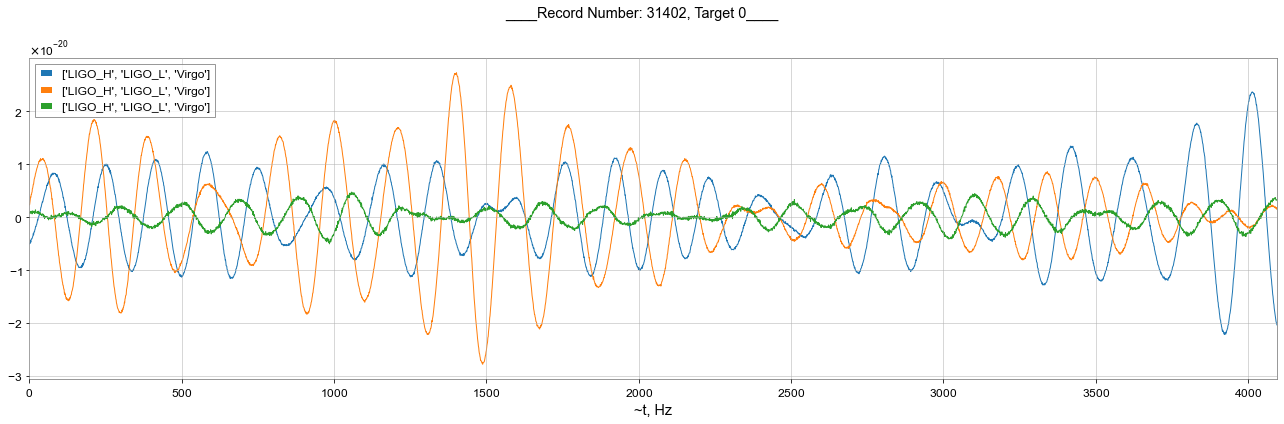

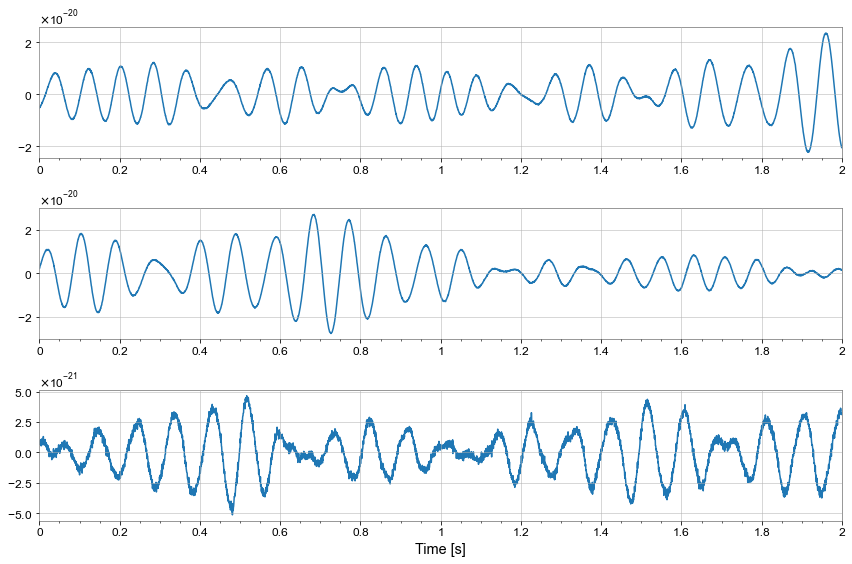

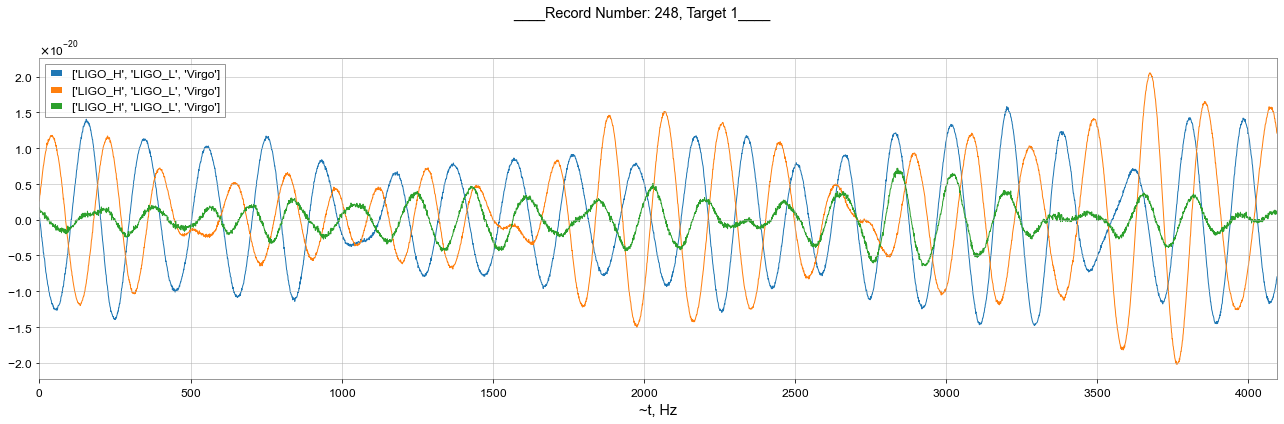

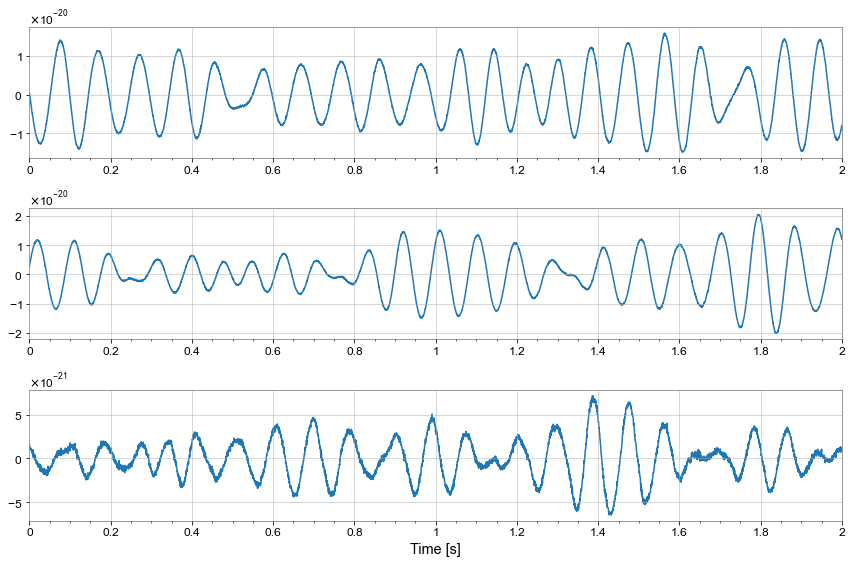

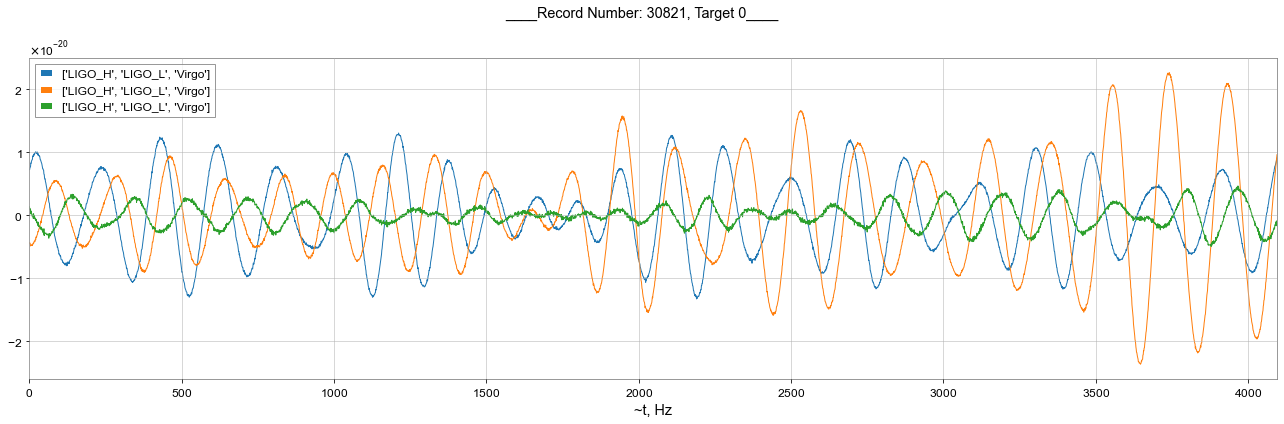

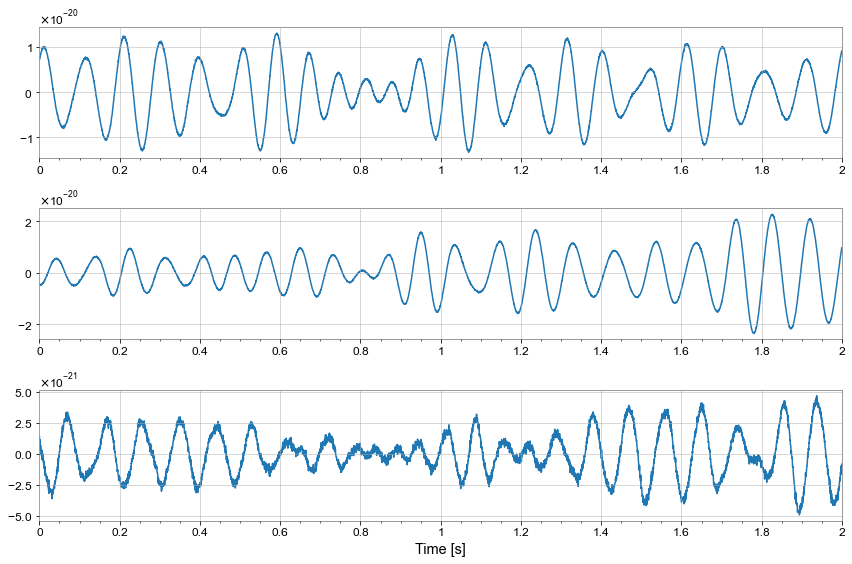

In [11]:
for i in np.random.randint(56000, size=3):
    plotting_the_signal(record_num=i, target=df['target'][i])

In [12]:
# To plot the record alone
def plotting_the_signal_alone(record_num, target, xlim = (0, 4096)):
    '''
    record_num: Location of the record
    
    target: Whether the signal is present in the record or not
    '''
    
    data = getting_the_signal(record_num)
    
    plt.figure(tight_layout=True, figsize=(18, 6))
    record_num = f'Record Number: {record_num}'
    target = f', Target {target}'
    
    plt.suptitle(f'____{record_num}{target}____')
    plt.plot(data.T, label=['LIGO_H', 'LIGO_L', 'Virgo'], lw=3)
    plt.xlabel('~t, Hz')
    plt.xlim(xlim)
    plt.legend()

In [13]:
# To plot the record where signal is present and vice versa to compare them
def plot_to_compare(number_of_records_each):
    '''
    number_of_records_each:Number of records you want on each
    '''
    temp_list = df[df['target']==0].sample(number_of_records_each)['path'].to_list()
    [temp_list.append(i) for i in df[df['target']==1].sample(number_of_records_each)['path'].to_list()]
    
    for i in temp_list:
        plotting_the_signal_alone(record_num=df[df['path']==i].index[0], target=df[df['path']==i]['target'].to_list()[0])
        

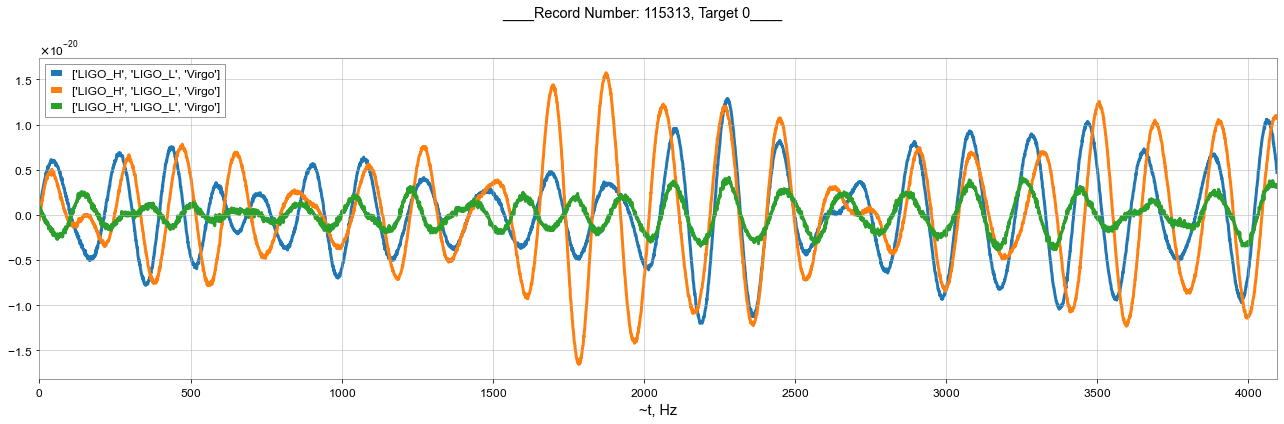

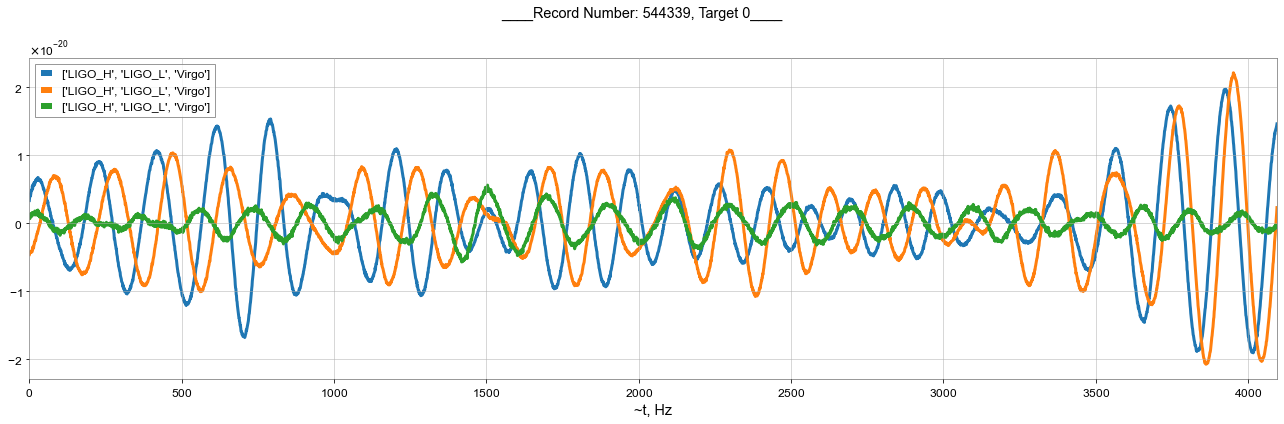

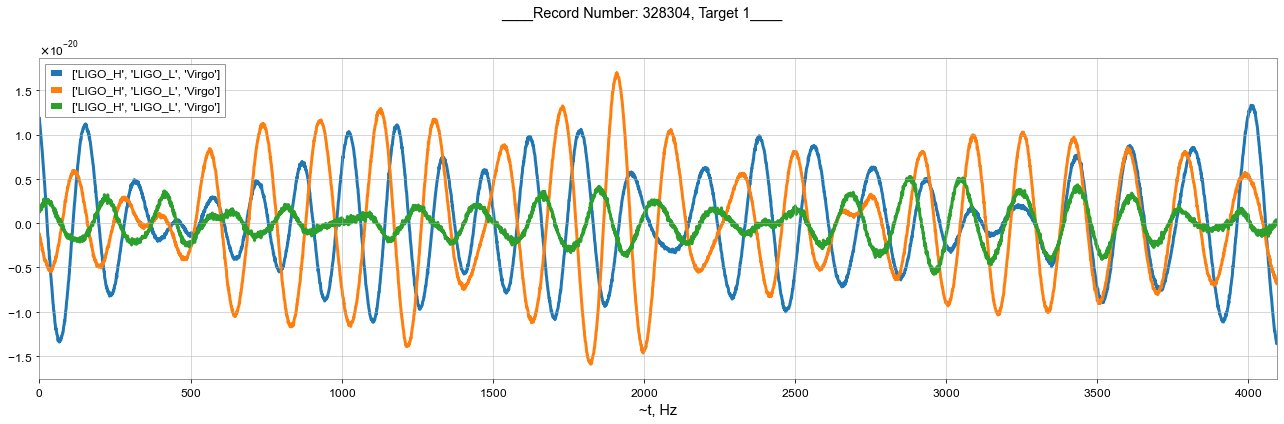

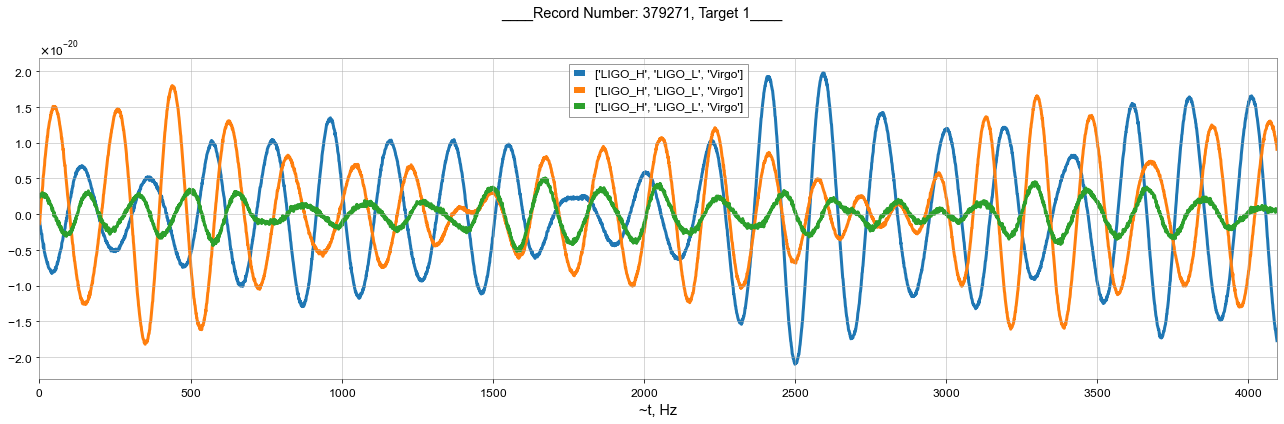

In [14]:
plot_to_compare(2)

In [15]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# We're converting the time domain into frequency domain and plotting it
For more info: https://www.youtube.com/watch?v=5foHK_K151w

In [16]:
# To plot the frequency domain graph
def plotting_freq_domain(record_num:int):
    fig = make_subplots( rows = 1, cols = 1)
    d1,d2,d3 = read_file(getting_the_signal(record_num))
    print('Target = ', df.iloc[record_num]['target'])
    
    fig.add_trace(go.Line(x=np.fft.rfftfreq( 2* 2048, (1/ 4096)) , y = 20*np.log(np.abs(np.fft.rfft(d1))),name ="LIGO Hanford target"),row=1, col=1)
    fig.add_trace(go.Line(x=np.fft.rfftfreq( 2* 2048, (1/ 4096)) , y = 20*np.log(np.abs(np.fft.rfft(d2))),name ="LIGO Livingston target"),row=1, col=1)
    fig.add_trace(go.Line(x=np.fft.rfftfreq( 2* 2048, (1/ 4096)) , y = 20*np.log(np.abs(np.fft.rfft(d3))),name ="LIGO Virgo target"),row=1, col=1)
    
    fig.update_layout( title ="Frequenzy domain ")
    fig.update_xaxes( title ="Freq in Hz")
    fig.show()

In [17]:
plotting_freq_domain(556000)

Target =  1


D:\IDE\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [18]:
plotting_freq_domain(2600)

Target =  0


We can't use this as an input to our model. So we'll be using Q-Transform to convert the data into frequency domain image.

Source : https://en.wikipedia.org/wiki/Constant-Q_transform